# Kernel 1위
- https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial

# 해당 Kernel에서 다루고자 하는 것

1. Exploratory Data Analysis: 자연어에 대한 데이터 탐색
2. Natural Language Processing with NLTK: 자연어 데이터 전처리
3. Topic modeling with LDA(latent dirichlet allocation): 토픽 모델링

참고

1) NLTK: 가장 기본적인 자연어 처리 라이브러리

2) Topic modeling 

기계 학습 및 자연언어 처리 분야에서 토픽 모델(Topic model)이란 문서 집합의 추상적인 "주제"를 발견하기 위한 통계적 모델 중 하나로, 텍스트 본문의 숨겨진 의미구조를 발견하기 위해 사용되는 텍스트 마이닝 기법 중 하나이다. 특정 주제에 관한 문헌에서는 그 주제에 관한 단어가 다른 단어들에 비해 더 자주 등장할 것이다. 예를 들어 개에 대한 문서에서는 "개"와 "뼈다귀"라는 단어가 더 자주 등장하는 반면, 고양이에 대한 문서에서는 "고양이"와 "야옹"이 더 자주 등장할 것이고, "그", "~이다"와 같은 단어는 양쪽 모두에서 자주 등장할 것이다. 이렇게 함께 자주 등장하는 단어들은 대게 유사한 의미를 지니게 되는데 이를 잠재적인 "주제"로 정의할 수 있다. 즉, "개"와 "뼈다귀"를 하나의 주제로 묶고, "고양이"와 "야옹"을 또 다른 주제로 묶는 모형을 구상할 수 있는데 바로 이것이 토픽 모델의 개략적인 개념이다. 실제로 문헌 내에 어떤 주제가 들어있고, 주제 간의 비중이 어떤지는 문헌 집합 내의 단어 통계를 수학적으로 분석함으로써 알아 낼 수 있다.

[Topic Moedling - 위키피디아](https://ko.wikipedia.org/wiki/%ED%86%A0%ED%94%BD_%EB%AA%A8%EB%8D%B8)



<hr>

# 1. Exploratory Data Analysis

1. 저자별 데이터 개수
2. 단어별 빈도 수
3. 단어 분포

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
# 시각화 라이브러리 plotly
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(
    username='lifesailor', 
    api_key='FFxsSIcGxSZddlGOLXtl')

ModuleNotFoundError: No module named 'plotly'

In [3]:
# 파일 읽기
base_path = '/Users/lifesailor/.kaggle/spooky/'
train_path = os.path.join(base_path, 'train.csv')
train = pd.read_csv(train_path)

In [4]:
train.head()

id                                               text author
0  id26305  This process, however, afforded me no means of...    EAP
1  id17569  It never once occurred to me that the fumbling...    HPL
2  id11008  In his left hand was a gold snuff box, from wh...    EAP
3  id27763  How lovely is spring As we looked from Windsor...    MWS
4  id12958  Finding nothing else, not even gold, the Super...    HPL

## 1. 저자별 단어 수

In [5]:
# 실제 저자 이름 mapping
z = {'EAP': 'Edgar Allen Poe', 'MWS': 'Mary Shelley', 'HPL': 'HP Lovecraft'}

# 각 저자별 개수를 barplot으로 비교한다.
data = [go.Bar(
            # x축 - unique author
            x = train.author.map(z).unique(),
            
            # y축`- value counts
            y = train.author.value_counts().values,
            marker= dict(colorscale='Jet',
                         color = train.author.value_counts().values
                        ),
            text='Text entries attributed to Author'
    )]

layout = go.Layout(
    title='Target variable distribution'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

## 2. 가장 빈도 수 높은 단어 수

In [6]:
# 모든 단어를 구한다.
all_words = train['text'].str.split(expand=True).unstack().value_counts()

# 2순위부터 50순위까지 Plot
data = [go.Bar(
    x = all_words.index.values[2:50],
    y = all_words.values[2:50],
    marker = dict(colorscale='Jet',
                  color=all_words.values[2:100]
                 ),
    text='Word counts'
)]

layout = go.Layout(
    title='Top 50 Word Frequencies in the training set'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

## 3. wordcloud

- 이 커널에서 특이한 점은 기본 wordcloud가 아니라 특정 그림 형태의 wordcloud를 생성했다는 점이다.
- 하지만, 로컬 환경에서 해당 mask가 제대로 실행되지 않아 그냥 일반 wordcloud로 변경했습니다.
- 원 저자의 [커널](https://www.kaggle.com/arthurtok/spooky-nlp-and-topic-modelling-tutorial)을 참고 하면 좋겠습니다.

In [7]:
eap = train[train.author=="EAP"]["text"].values
hpl = train[train.author=="HPL"]["text"].values
mws = train[train.author=="MWS"]["text"].values

In [8]:
from matplotlib import pyplot as plt
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
import codecs

- Kernel 저자의 트릭: 먼저 사용하려는 이미지의 Base64 인코딩을 가져온 다음 해당 인코딩을 사용하고 노트북에서 그림을 다시 변환합니다.

### 1. HP Lovecraft

(-0.5, 399.5, 199.5, -0.5)

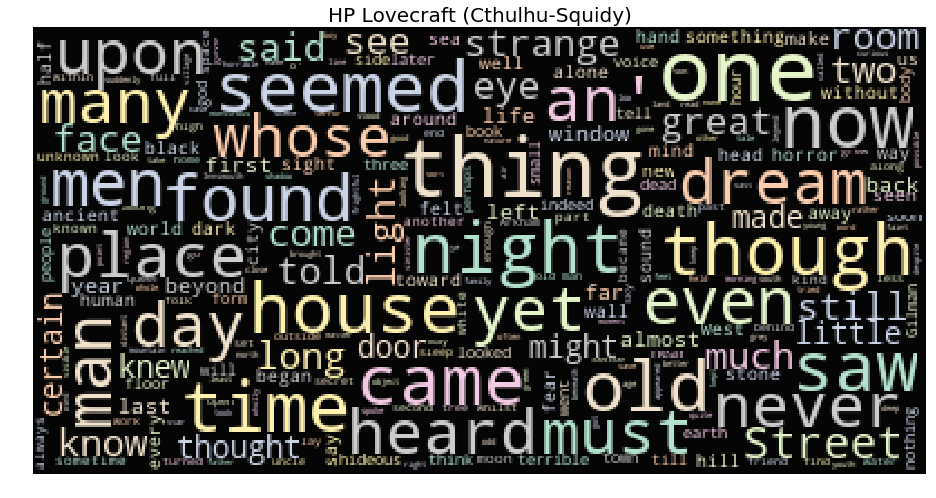

In [9]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black",
               max_words=10000, 
               stopwords=STOPWORDS, 
               max_font_size= 40)
wc.generate(" ".join(hpl))
plt.title("HP Lovecraft (Cthulhu-Squidy)", fontsize=20)
plt.imshow(wc.recolor( colormap= 'Pastel2' , random_state=17), alpha=0.98)
plt.axis('off')

### 2. Edgar Allen Poe

(-0.5, 399.5, 199.5, -0.5)

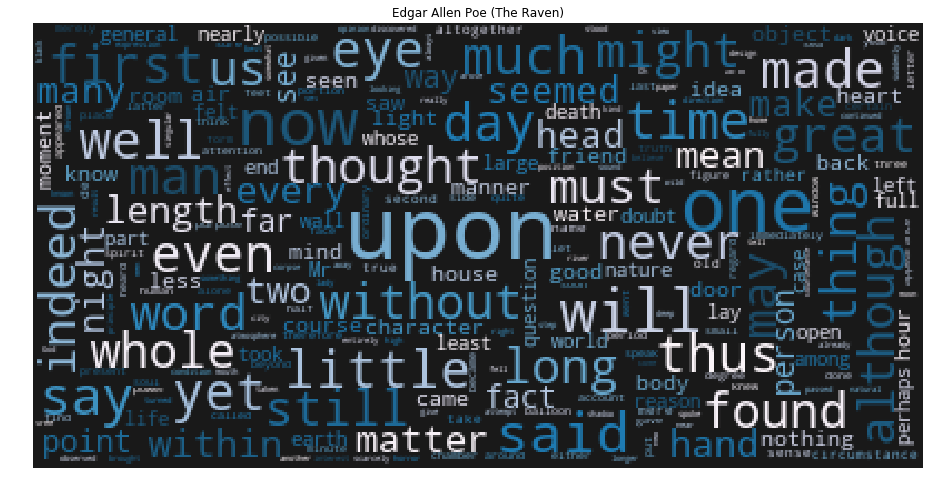

In [10]:
plt.figure(figsize=(20,18))
plt.subplot(211)
wc = WordCloud(background_color="black", 
               max_words=10000, 
               stopwords=STOPWORDS, 
               max_font_size= 40)
wc.generate(" ".join(eap))
plt.title("Edgar Allen Poe (The Raven)")
plt.imshow(wc.recolor( colormap= 'PuBu' , random_state=17), alpha=0.9)
plt.axis('off')

### 3. Mary Shelley

(-0.5, 399.5, 199.5, -0.5)

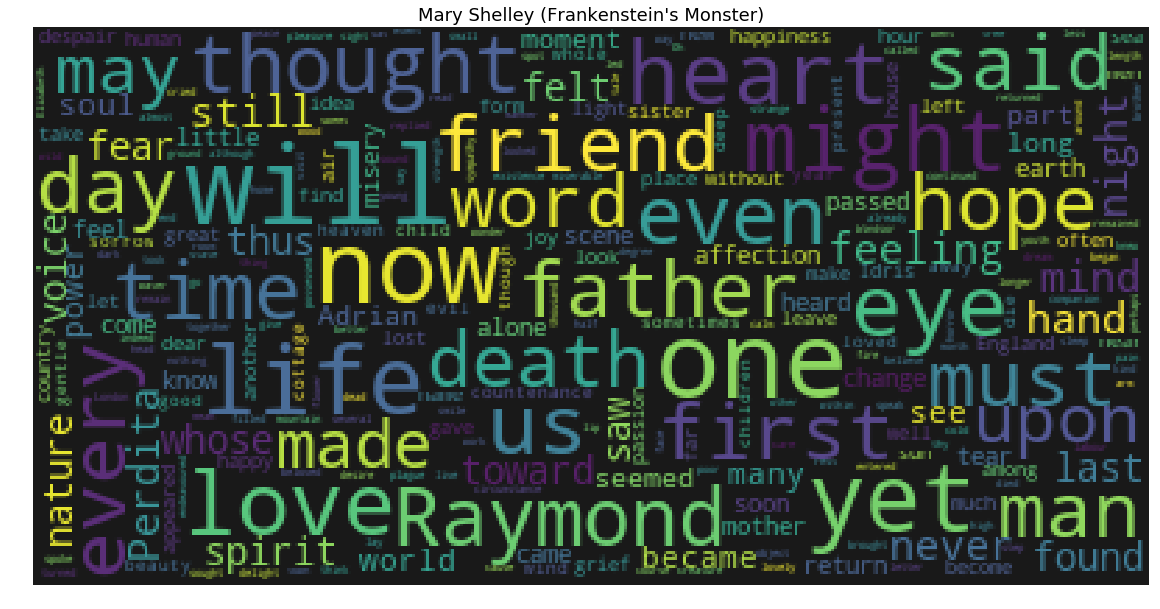

In [12]:
plt.figure(figsize=(20,18))
wc = WordCloud(background_color="black", 
               max_words=10000, 
               stopwords=STOPWORDS, 
               max_font_size= 40)
wc.generate(" ".join(mws))
plt.title("Mary Shelley (Frankenstein's Monster)", fontsize= 18)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.9)
plt.axis('off')

# 2. Natural Language Processing

자연어 처리의 기본은 자연어를 모델과 기계가 인식할 수 있도록 만드는 것이다. 기본적으로 preprocessing은 다음 절차를 거친다.

1. Tokenization - Text를 개별 구성 단어 단위로 분리한다.
2. Stopwords - 너무 자주 나와서 관련 text를 detect하는데 도움되지 않는 것을 제거한다.
3. Stemming - 다양한 단어를 하나의 부모 단어로 결합한다. (helps, helped > help)
4. Vectorization - text를 벡터 형태로 바꾼다.


In [13]:
# 가장 기본적인 자연어 처리 라이브러리
import nltk

## 1. Tokenization

In [14]:
first_text = train.text.values[0]
print(first_text)
print('='*90)
print(first_text.split(' '))

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.
['This', 'process,', 'however,', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon;', 'as', 'I', 'might', 'make', 'its', 'circuit,', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out,', 'without', 'being', 'aware', 'of', 'the', 'fact;', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall.']


- 그냥 띄어쓰기를 하면 '.'등이 같이 하나의 단어가 되어버린다.

In [15]:
first_text_list = nltk.word_tokenize(first_text)
print(first_text_list)

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


## 2. Stopword 제거

In [16]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:5])
len(stopwords)

['i', 'me', 'my', 'myself', 'we']


179

In [17]:
first_text_list_cleaned = [word for word in first_text_list if word.lower() not in stopwords]
print(first_text_list_cleaned)
print('='*90)
print("Length of original list: {0} words \n"
      "Length of list after stopwords removal: {1} words"
      .format(len(first_text_list), len(first_text_list_cleaned)))

['process', ',', 'however', ',', 'afforded', 'means', 'ascertaining', 'dimensions', 'dungeon', ';', 'might', 'make', 'circuit', ',', 'return', 'point', 'whence', 'set', ',', 'without', 'aware', 'fact', ';', 'perfectly', 'uniform', 'seemed', 'wall', '.']
Length of original list: 48 words 
Length of list after stopwords removal: 28 words


## 3. Stemming and Lemmatization

- Stemming: 어간 추출

In [18]:
stemmer = nltk.stem.PorterStemmer()

In [19]:
# 잘 된 예시
print("The stemmed form of running is: {}".format(stemmer.stem("running")))
print("The stemmed form of runs is: {}".format(stemmer.stem("runs")))
print("The stemmed form of run is: {}".format(stemmer.stem("run")))

The stemmed form of running is: run
The stemmed form of runs is: run
The stemmed form of run is: run


In [20]:
# 잘 안 된 예시 - Heuristic하게 작동한다.
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaves")))
print("The stemmed form of leaves is: {}".format(stemmer.stem("leaf")))

The stemmed form of leaves is: leav
The stemmed form of leaves is: leaf


- Lemmatization: 표제어 추출

In [21]:
from nltk.stem import WordNetLemmatizer
lemm = WordNetLemmatizer()
print("The lemmatized form of leaves is: {}".format(lemm.lemmatize("leaves")))

The lemmatized form of leaves is: leaf


[Stemming과 Lemmatization 차이](http://4four.us/article/2008/05/lemmatization)

Lemmatization이란 문장 속에서 다양한 형태로 활용된(inflected) 단어의 표제어(lemma)를 찾는 일을 뜻한다. 여기서 말하는 표제어란 사전에서 단어의 뜻을 찾을 때 쓰는 기본형이라고 생각하면 된다. 예를 들어, ‘아름다운’이 Lemmatization을 거치면 ‘아름답다’가 된다. Stemming과 비슷해 보이지만 중요한 차이가 있다. Stemming은 단어 그 자체만을 고려하지만 Lemmatization은 그 단어가 문장 속에서 어떤 품사(Part-of-speech)로 쓰였는지까지 판단한다.

한국어에서는 적절한 예가 떠오르지 않아서 영어를 예로 들면, () ‘flies’가 주어졌을 때 Stemming은 단순히 이 단어의 어근을 내놓는데 비해 Lemmatization은 문장 속에서 ‘files’가 동사 ‘날다’ 와 명사 ‘파리’ 중 어떤 뜻으로 쓰였는지까지 결정할 수 있어야 한다. 그렇기 때문에 Lemmatization을 수행하려면 문장 구조 분석 같은 언어적 이해가 필요하고 따라서 Stemming에 비해 복잡한 처리 과정을 거쳐야 한다.


## 4. Vectorizing Raw Text

### 1. Bag of words

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
sentence = ["I love to eat Burgers", 
            "I love to eat Fries"]
vectorizer = CountVectorizer(min_df=0)
sentence_transform = vectorizer.fit_transform(sentence)

In [24]:
print("The features are:\n {}".format(vectorizer.get_feature_names()))
print("\nThe vectorized array looks like:\n {}".format(sentence_transform.toarray()))

The features are:
 ['burgers', 'eat', 'fries', 'love', 'to']

The vectorized array looks like:
 [[1 1 0 1 1]
 [0 1 1 1 1]]


In [25]:
# sparse array
sentence_transform

<2x5 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [26]:
sentence_transform.toarray()

array([[1, 1, 0, 1, 1],
       [0, 1, 1, 1, 1]], dtype=int64)

# 3. Topic modeling

1. Latent Dirichlet Allocation: 잠재 변수 토픽을 바탕으로 각 문서에 대해서 토픽 확률을 부여하고 각 토픽에 해당하는 단어마다 확률을 부여하는 모델
2. Non-negative Matrix Factorization: Matrix를 two other matricies로 factorziation 하는 방법

In [27]:
# 모델의 각 토픽의 top word를 출력
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words -1 : -1]])
        print(message)
        print('='*70)

## 1. 전처리

In [28]:
lemm = WordNetLemmatizer()

# CountVectorizer를 Lemmatizer 기능까지 통합해서 확장
class LemmaCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(LemmaCountVectorizer, self).build_analyzer()
        return lambda doc: (lemm.lemmatize(w) for w in analyzer(doc))

In [29]:
text = list(train.text.values)
tf_vectorizer = LemmaCountVectorizer(max_df=0.95,
                                     min_df=2,
                                     stop_words='english',
                                     decode_error='ignore')

In [30]:
# LemmaCountVectorizer 수행
tf = tf_vectorizer.fit_transform(text)

- 다시 Term Frequency 출력

In [31]:
# feature name
feature_names = tf_vectorizer.get_feature_names()

# count
count_vec = np.asarray(tf.sum(axis=0)).ravel()
zipped = list(zip(feature_names, count_vec))

zip wants a bunch of arguments to zip together, but what you have is a single argument (a list, whose elements are also lists). The * in a function call "unpacks" a list (or other iterable), making each of its elements a separate argument. So without the *, you're doing zip( [[1,2,3],[4,5,6]] ). With the *, you're doing zip([1,2,3], [4,5,6]).

In [32]:
# 상위 15개, 하위 15개
x, y = (list(x) for x in zip(*sorted(zipped, key=lambda x: x[1], reverse=True)))
Y = np.concatenate([y[0:15], y[-16:-1]])
X = np.concatenate([x[0:15], x[-16:-1]])

In [33]:
# 상위 50개
data = [go.Bar(
            x = x[0:50],
            y = y[0:50],
            marker= dict(colorscale='Jet',
                         color = y[0:50]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Top 50 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

In [34]:
# 하위 100개
data = [go.Bar(
            x = x[-100:],
            y = y[-100:],
            marker= dict(colorscale='Portland',
                         color = y[-100:]
                        ),
            text='Word counts'
    )]

layout = go.Layout(
    title='Bottom 100 Word frequencies after Preprocessing'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')

## 2. LDA 모델링

In [35]:
from sklearn.decomposition import LatentDirichletAllocation

In [36]:
# n_componetnts: 토픽 개수
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

In [37]:
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_components=11, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=0, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

### LDA에서 생성된 토픽에 해당하는 단어 출력

In [38]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0mean night fact young return great human looking wonder countenance difficulty greater wife finally set possessed regard struck perceived act society law health key fearful mr exceedingly evidence carried home write lady various recall accident force poet neck conduct investigation

Topic #1death love raymond hope heart word child went time good man ground evil long misery replied filled passion bed till happiness memory heavy region year escape spirit grief visit doe story beauty die plague making influence thou letter appeared power

Topic #2left let hand said took say little length body air secret gave right having great arm thousand character minute foot true self gentleman pleasure box clock discovered point sought pain nearly case best mere course manner balloon fear head going

Topic #3called sense table suddenly sympathy machine sens unusual labour thrown mist solution suppose specie movement whispered urged frequent wine hour appears ring turk p

### Word Cloud로 토픽 시각화

In [39]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]

In [40]:
# 상위 50개 단어 추출
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]

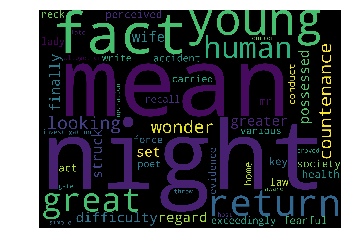

In [41]:
# 첫 번째 토픽을 설명하는 가장 확률이 높은 단어
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=2500,
                          height=1800
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()

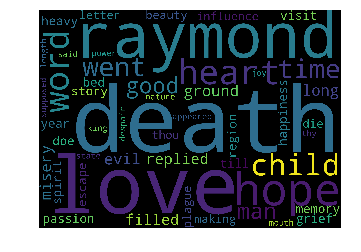

In [42]:
# 두 번째 토픽을 설명하는 가장 확률이 높은 단어
cloud = WordCloud(
                  stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800
                 ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

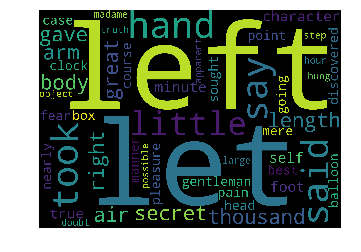

In [43]:
# 세 번째 토픽을 설명하는 가장 확률이 높은 단어
cloud = WordCloud(
                  stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800
                 ).generate(" ".join(third_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

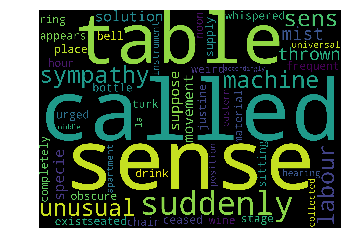

In [45]:
# 네 번째 토픽을 설명하는 가장 확률이 높은 단어
cloud = WordCloud(
                  stopwords=STOPWORDS,
                  background_color='black',
                  width=2500,
                  height=1800
                 ).generate(" ".join(fourth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()